test2
andrew y ernesto

In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
print("testing")

testing


In [2]:
dataset = pd.read_excel("Data_Train.xlsx")
#print(dataset.describe(include='all'))
print(dataset.head())

       Airline Date_of_Journey    Source Destination                  Route  \
0       IndiGo      24/03/2019  Banglore   New Delhi              BLR → DEL   
1    Air India       1/05/2019   Kolkata    Banglore  CCU → IXR → BBI → BLR   
2  Jet Airways       9/06/2019     Delhi      Cochin  DEL → LKO → BOM → COK   
3       IndiGo      12/05/2019   Kolkata    Banglore        CCU → NAG → BLR   
4       IndiGo      01/03/2019  Banglore   New Delhi        BLR → NAG → DEL   

  Dep_Time  Arrival_Time Duration Total_Stops Additional_Info  Price  
0    22:20  01:10 22 Mar   2h 50m    non-stop         No info   3897  
1    05:50         13:15   7h 25m     2 stops         No info   7662  
2    09:25  04:25 10 Jun      19h     2 stops         No info  13882  
3    18:05         23:30   5h 25m      1 stop         No info   6218  
4    16:50         21:35   4h 45m      1 stop         No info  13302  


In [3]:
# Función que convierte los datos no numéricos de
# la propiedad "Total_Stops" en numéricos.
# Entrada: stringDtype; Salida: integer
def uniform_stops(data):
    if type(data) == float: # De ser un dato vacío,
        data = 0 # Asigna una cantidad de 0 horas.
    elif type(data) != np.int64: # De ser el dato un string,
        # inicia el ciclo.
        if data == "non-stop": # Si "non-stop",
            data = 0 # Guarda el número de paradas como 0
        else: # Sino,
            data = int(data[0]) # Guarda el número de paradas que corresponde
            # al primer dígito del dato.
    return data
# Función que convierte los datos no numéricos de
# la propiedad "Duration" en numéricos.
# Entrada: stringDtype; Salida: integer
def uniform_duration(data):
    if data.find("m") == -1: # Dato con formato “#h”
        [horas] = data.split(" ") # Asigna a "horas"
        horas = horas.strip("h") # el número de horas
        minutos = 0 # y a "minutos" 0
    elif data.find("h") == -1: # Dato con formato “#m”
        [minutos] = data.split(" ") # Asigna a "minutos"
        minutos = minutos.strip("m") # el número de minutos
        horas = 0 # y a "horas" 0
    else:
        [horas, minutos] = data.split(" ") # Dato con formato “#h #m”
        minutos = minutos.strip("m") # Extrae las horas y minutos
        horas = horas.strip("h") # y los asigna a la variable apropiada
    # Se suma la cantidad de minutos totales que durará el vuelo
    data = int(horas)*60 + int(minutos)
    return data


In [4]:
# Procesamiento de datos
dataset["Duration"] = dataset["Duration"].apply(lambda x: uniform_duration(x))
dataset["Total_Stops"] = dataset["Total_Stops"].apply(lambda x: uniform_stops(x))
dataset = dataset[["Duration", "Total_Stops","Price"]]
# Normalizado
max_val = dataset.max(axis=0) # Se obtiene el máximo de cada columna
min_val = dataset.min(axis=0) # Se obtiene el mínimo de cada columna
range = max_val - min_val # Se obtiene la diferencia de los dos
dataset = (dataset - min_val)/(range) # Y se utiliza para normalizarlas
dataset = dataset.astype(float) # Se asegura que los datos sean tipo float
print(dataset)

       Duration  Total_Stops     Price
0      0.057793         0.00  0.027497
1      0.154116         0.50  0.075920
2      0.397548         0.50  0.155917
3      0.112084         0.25  0.057348
4      0.098074         0.25  0.148457
...         ...          ...       ...
10678  0.050788         0.00  0.030198
10679  0.052539         0.00  0.030687
10680  0.061296         0.00  0.070351
10681  0.054291         0.00  0.140046
10682  0.173380         0.50  0.128535

[10683 rows x 3 columns]


In [5]:
train_percentage=0.7
# Distribución de los datos
trainset = dataset.sample(frac=train_percentage) # Se extraen datos
# para el entrenamiento
testset = dataset.drop(trainset.index) # Y se le quitan esos mismos
# al dataset para crear los datos de prueba
print(trainset)
print(testset)

       Duration  Total_Stops     Price
7116   0.423818         0.25  0.156676
2676   0.276708         0.25  0.130889
2540   0.521891         0.25  0.101655
10005  0.224168         0.25  0.095045
8308   0.059545         0.00  0.140059
...         ...          ...       ...
6621   0.059545         0.00  0.027510
947    0.269702         0.25  0.156676
8934   0.380035         0.25  0.135365
8821   0.614711         0.50  0.174656
7513   0.056042         0.00  0.066904

[7478 rows x 3 columns]
       Duration  Total_Stops     Price
1      0.154116         0.50  0.075920
3      0.112084         0.25  0.057348
4      0.098074         0.25  0.148457
10     0.276708         0.25  0.091932
12     0.045534         0.00  0.037400
...         ...          ...       ...
10668  0.152364         0.50  0.250280
10669  0.234676         0.25  0.105076
10671  0.026270         0.00  0.017247
10676  0.180385         0.25  0.103340
10682  0.173380         0.50  0.128535

[3205 rows x 3 columns]


In [6]:
network = tf.keras.models.Sequential()
# Declaración de la capa de entrada
network.add(tf.keras.layers.Dense(
units=10,
input_shape=(2,)))
# Ciclo de capas de neuronas intermedias
i = 0
while i < 2-1:
    network.add(tf.keras.layers.Dense(
    units=10,
    activation="relu"))
    i += 1
# Declaración de la capa de salida
network.add(tf.keras.layers.Dense(
units=1,
activation="sigmoid"))

In [7]:
network.compile(
optimizer="adam",
loss="mse")

In [8]:
losses = network.fit(x=trainset[["Duration", "Total_Stops"]],
y=trainset['Price'],
validation_data=(
testset[["Duration", "Total_Stops"]],
testset['Price']),
batch_size=300,
epochs=40
)

Epoch 1/40
25/25 [==============================] - 2s 19ms/step - loss: 0.1336 - val_loss: 0.1151
Epoch 2/40
25/25 [==============================] - 0s 4ms/step - loss: 0.0974 - val_loss: 0.0789
Epoch 3/40
25/25 [==============================] - 0s 4ms/step - loss: 0.0636 - val_loss: 0.0490
Epoch 4/40
25/25 [==============================] - 0s 6ms/step - loss: 0.0393 - val_loss: 0.0303
Epoch 5/40
25/25 [==============================] - 0s 4ms/step - loss: 0.0251 - val_loss: 0.0198
Epoch 6/40
25/25 [==============================] - 0s 4ms/step - loss: 0.0175 - val_loss: 0.0144
Epoch 7/40
25/25 [==============================] - 0s 4ms/step - loss: 0.0134 - val_loss: 0.0115
Epoch 8/40
25/25 [==============================] - 0s 4ms/step - loss: 0.0113 - val_loss: 0.0098
Epoch 9/40
25/25 [==============================] - 0s 6ms/step - loss: 0.0100 - val_loss: 0.0088
Epoch 10/40
25/25 [==============================] - 0s 6ms/step - loss: 0.0092 - val_loss: 0.0082
Epoch 11/40
25/25 

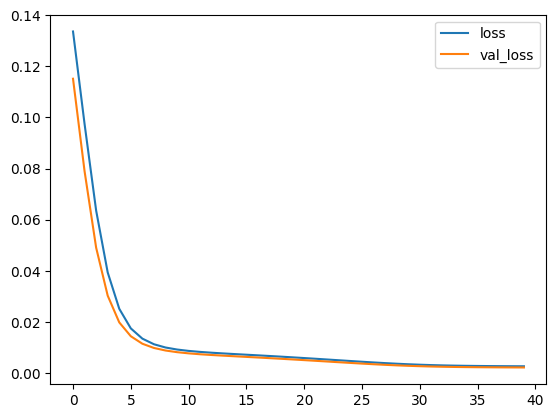

In [9]:
# Se extrae el historial de error contra iteraciones de la clase
loss_df = pd.DataFrame(losses.history)
# Se grafica
loss_df.loc[:, ['loss', 'val_loss']].plot()
# Y se pide que se muestre la ventana en que se graficó
plt.show()

In [10]:
# Se eligen 10 datos al azar
dato = dataset.sample(frac=10/dataset.shape[0])
datoPrueba = dato.drop(columns=["Price"])
# Y se predice el precio que tendría, luego de
# revertir la normalización
precio = network.predict(datoPrueba)
print("Dato ingresado:")
print(dato*range+ min_val) # Se normalizan los datos
dato["Price"] = precio
print("Estimación: ")
print(dato*range+ min_val)

1/1 [==============================] - 0s 133ms/step
Dato ingresado:
      Duration  Total_Stops    Price
9217     165.0          0.0   7171.0
3130     860.0          1.0  12351.0
6238      95.0          0.0   2227.0
6251    1595.0          1.0  12373.0
1800    1025.0          1.0  11134.0
4518     295.0          1.0   7166.0
9281      85.0          0.0   2228.0
3282     960.0          1.0  14571.0
346      540.0          1.0  16079.0
2635     550.0          1.0  26890.0
Estimación: 
      Duration  Total_Stops         Price
9217     165.0          0.0   7210.756450
3130     860.0          1.0   9849.343550
6238      95.0          0.0   7100.263291
6251    1595.0          1.0  11809.952059
1800    1025.0          1.0  10233.074019
4518     295.0          1.0   8649.564675
9281      85.0          0.0   7084.648705
3282     960.0          1.0  10080.036123
346      540.0          1.0   9148.748312
2635     550.0          1.0   9169.795621


In [11]:
from ann_visualizer.visualize import ann_viz;
#Build your model here
ann_viz(network)